In [4]:
# --------------------------------------------------------------
# Simple Linear Regression
# Predict the marks obtained by a student based on hours of study
# --------------------------------------------------------------


# Import Pandas for data processing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline

In [5]:
# Read the CSV file
students = pd.read_csv(r'01Students.csv')

In [6]:
students.head()

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42


In [89]:
students.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


In [7]:
students.shape

(30, 2)

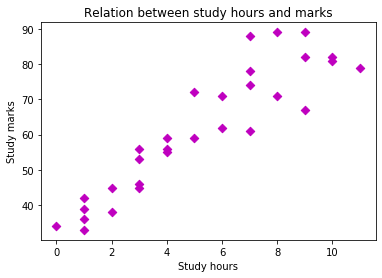

In [87]:
plt.scatter(x = students.Hours, y = students.Marks, c = 'm', marker='D')
plt.xlabel('Study hours')
plt.ylabel('Study marks')
plt.title('Relation between study hours and marks')
plt.show()

In [88]:
students.corr()

,Hours,Marks
Hours,1.000000,0.913894
Marks,0.913894,1.000000


In [8]:
# Split into X (Independent) and Y (predicted)
X = students['Hours'].values.reshape(-1,1)
y = students['Marks'].values.reshape(-1,1)

In [9]:
# Create the Training and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# Train the Simple Linear Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Predict the results
students_coef = pd.Series([regressor.intercept_, regressor.coef_], index=['Intercept', 'Slope'])
students_coef

Intercept     [35.556574923547394]
Slope        [[4.922018348623854]]
dtype: object

In [26]:
# Get the R-Squared 
r_sq = regressor.score(X, y).round(2)
print('R squared:', r_sq)

R squared: 0.83


In [28]:
# Coefficient and Intercept
print(regressor.intercept_)
print(regressor.coef_)

[35.55657492]
[[4.92201835]]


In [29]:
# Equation of the line
#  write here the equation in comment

# Calculate the errors using RMSE 
# y = 35.56 + 4.92*X

In [69]:
y_pred = regressor.predict(X_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[40.47859327]
 [84.77675841]
 [55.24464832]
 [50.32262997]
 [79.85474006]
 [79.85474006]]


In [72]:
prediction = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
prediction

,Actual,Predicted
0,33,40.478593
1,82,84.776758
2,56,55.244648
3,56,50.322630
4,89,79.854740
5,82,79.854740


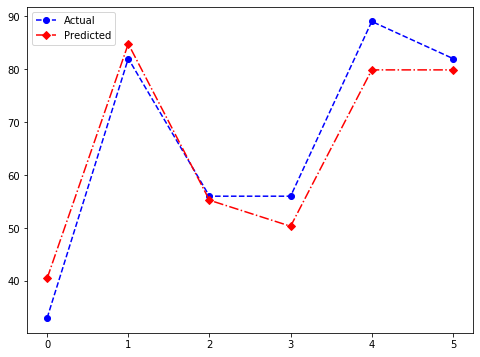

In [79]:
# plot the result using matplotlib 
fig = plt.figure(figsize=[8,6])
axis = fig.add_subplot(1,1,1)
axis.plot(prediction.Actual, 'bo--', label = 'Actual')
axis.plot(prediction.Predicted, 'rD-.', label = 'Predicted')
axis.legend(loc = 'best')